<h1 style="color:#07B30C" align="center"> Proyecto Final</h1>
<h2 style="color:#07B30C"align="center"> Daniela Arely Morales Hernández </h2>
<h3 style="color:#07B30C"align="center"> 142976 </h3>

# Comunicados de Política Monetaria
## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [321]:
import re
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime
from tqdm import tqdm 
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime
#from tqdm.notebook import tqdm
from time import sleep
from io import BytesIO
import PyPDF2
from PyPDF2 import PdfFileReader
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import nltk
from nltk import corpus
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [322]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [323]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

with HTMLSession() as sess:
    r = sess.get(url)

In [324]:
tr = r.html.find("tr")
len(tr)

184

* Entra a `url` y analiza la página.

In [325]:
print(url)

https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/anuncios-politica-monetaria-t.html


* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [326]:
def extract_info(article):
    text = "td[class='bmtextview']"
    date = "td[class='bmdateview']"
    ids = "span[class='bmdateview']"
    lin="a[title ='documento pdf se abrirá en otra pestaña']"

    url_article, *_ = filas.find(text, first=True).absolute_links
    title = filas.find(text, first=True).text
    #link, *_ = filas.find(lin, first=True).absolute_links
   
  #  title = title.split()
 #   idss= filas.find(ids, first=True).absolute_links
    date_str = filas.find(date, first=True).text
    date = datetime.strptime(date_str, "%d/%m/%y")
    #fecha=datetime.strptime(date_str, '%d/%m/%y').year
    return {
     #  "fechas ": fecha,
        "date": date,
        "title": title,
        "url": url_article
    }

In [327]:
import locale
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")

'es_ES.UTF-8'

In [328]:
contenido=[]
for fila in range(len(tr)):
    filas= tr[fila]
    f = extract_info(filas)
    contenido.append(f)

content = pd.DataFrame(contenido)  
content = content.set_index("date")
#content
#print(contenido)
#print(contenido)
#len(content)
content=content.loc[:"15-02-2008"]
content= content.sort_values(by="date", ascending=True)
#content["fechas"]
#pd.to_pickle(content,'comunicados-banxico.pkl')
content

,title,url
date,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-07-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-09-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-10-17,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

In [329]:
content['category'] = content["title"].str.extract('(incrementa|mantiene|disminuye)')
content.head()

,title,url,category
date,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


In [331]:
cat= content.category.unique()

cont= pd.DataFrame((content['category']).groupby(content['category']).count())
cont

,category
category,
disminuye,16
incrementa,18
mantiene,72


<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

In [332]:
def indicadores(categoria):
    if categoria == 'disminuye':
        valor = -1
    elif categoria == 'mantiene':
        valor = 0
    elif categoria == 'incrementa':
        valor = 1
    else:
        valor = -2
    return valor

indi = [indicadores(x) for x in list(content['category'])]
content = content.assign(indicador=indi)
content.head()

,title,url,category,indicador
date,,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene,0
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene,0
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene,0
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene,0
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa,1


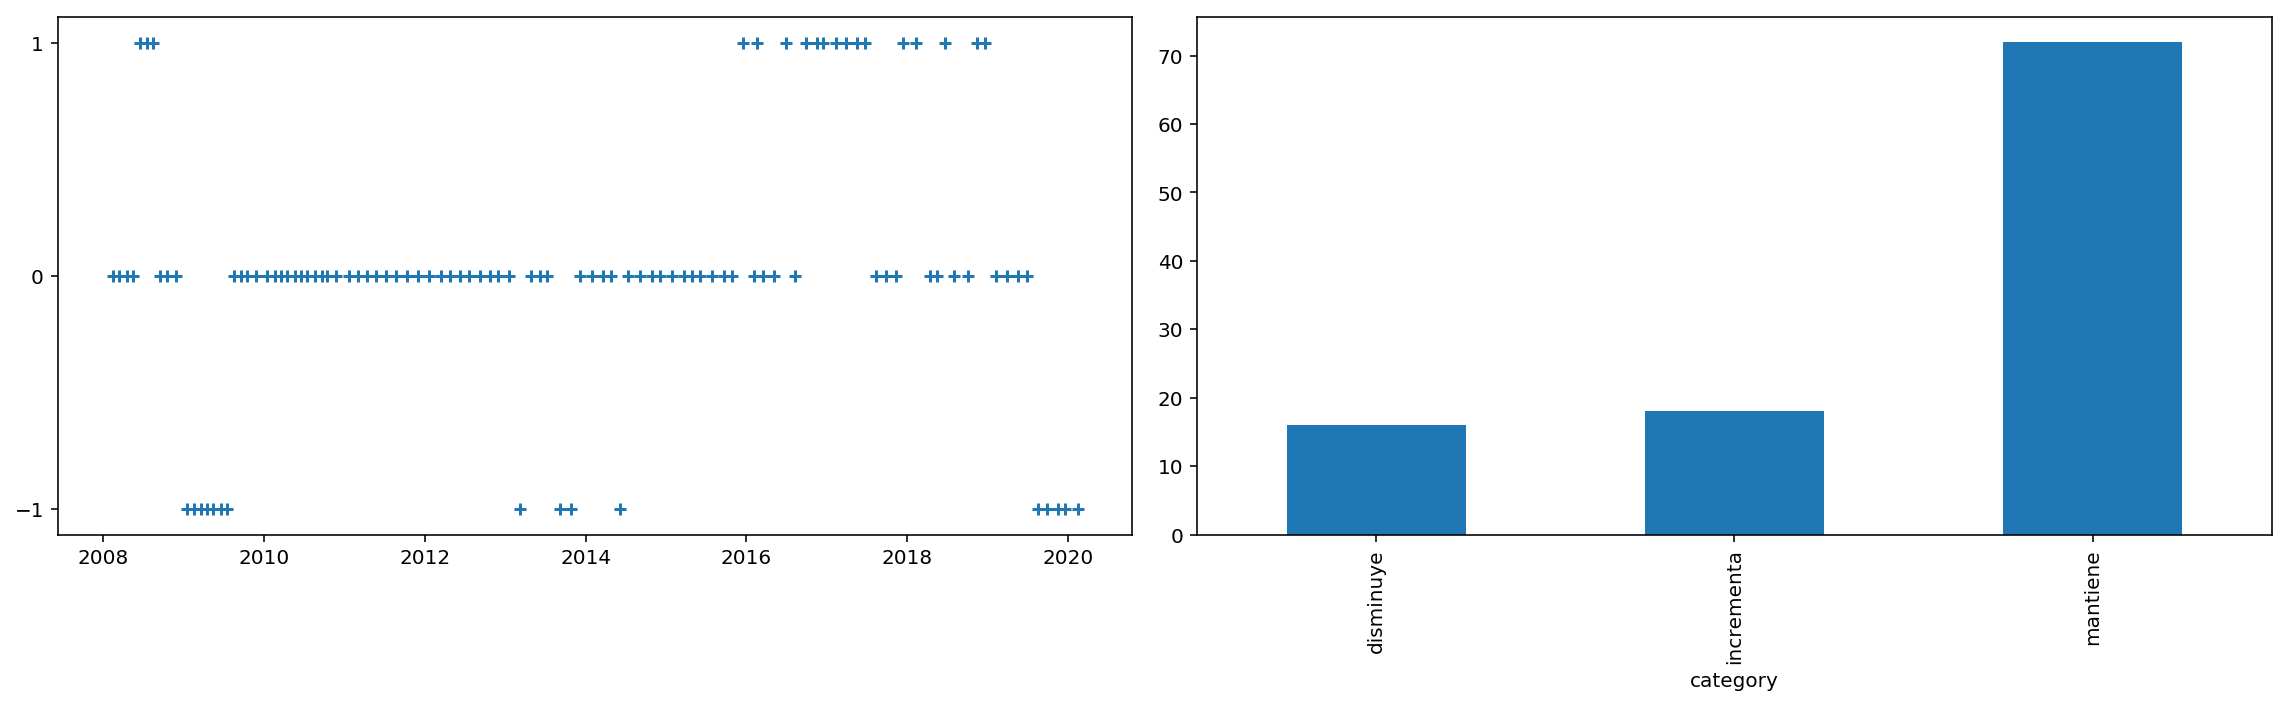

In [333]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16,5))
axs[0].scatter(x = content.index, y = content.indicador,
               marker = "+")
axs[0].set_yticks([-1,0,1])
axs[1] = content["indicador"].groupby(content.category).count().plot(kind="bar")
        
plt.show()

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [334]:
an=content.category.groupby(content.index.year).value_counts()
an

date  category  
2008  mantiene       7
      incrementa     3
2009  disminuye      7
      mantiene       4
2010  mantiene      11
2011  mantiene       8
2012  mantiene       8
2013  mantiene       5
      disminuye      3
2014  mantiene       7
      disminuye      1
2015  mantiene       7
      incrementa     1
2016  incrementa     5
      mantiene       4
2017  incrementa     5
      mantiene       3
2018  incrementa     4
      mantiene       4
2019  disminuye      4
      mantiene       4
2020  disminuye      1
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

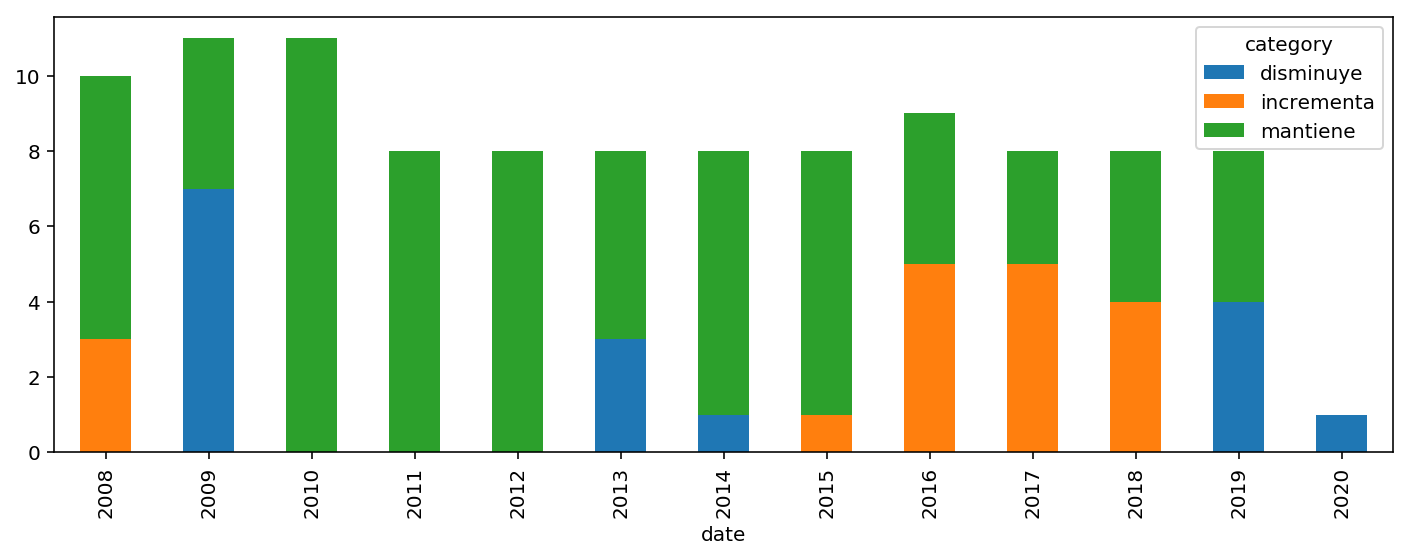

In [335]:
an.unstack(level=1).plot.bar(stacked=True)

In [336]:
for i in range(0,len(content)):
    r_1=requests.get(content.url[i],stream = True)
    paper=r_1.content
    #se guardan con el nombre de category y el date
    fil = str(content.category[i])+str(content.index[i]).replace(":", "-")
    #se guardan en la ruta deseada
    full_path=os.path.join("descargas",fil + ".pdf")
    with open(full_path,"wb") as f:
        f.write(paper)

In [337]:
def leerpdf(pdfs):
    """
    Función para estraer el contenido de un PDF
    """
    #se lee cada pdf
    with open(pdfs, "rb") as file:  
        pdf = PdfFileReader(file)
        text=""
        for p in range(0,pdf.getNumPages()):
            text += pdf.getPage(p).extractText() + "\n"
            text = " ".join(text.replace("\n", "").strip().split())
            text = " ".join(word.strip(string.punctuation) for word in texto.split() if word.isalpha())
    return text





In [338]:
pdfs = "C:/Users/danie/Desktop/DATA/Modificado/Modulo3/descargas/"+fil+".pdf"
textos = {}
lista1=[]
lista2=[]
lista3=[]

for j in range(0,len(content)):
    #nombre del archivo
    fil = str(content.category[j])+str(content.index[j]).replace(":", "-")
    info=leerpdf(pdfs)
    category = re.search("(mantiene|incrementa|disminuye)",fil).group(1)
    if category=="incrementa":
        lista1.append(info) 
    elif category=="disminuye":
        lista2.append(info) 
    elif category=="mantiene":
            lista3.append(info)  
    
cat={"incrementa":lista1,"disminuye":lista2,"mantiene":lista3}


{'incrementa': 18, 'disminuye': 16, 'mantiene': 72}

In [350]:
def limpia_texto(pdf):
    limpio = texto.lower()
    limpio = re.sub("[^\w ]", "", limpio) # quitamos todo lo que no sea alfanumerico o espacio 
    return limpio

In [393]:
K1,K2,K3 = "mantiene","incrementa","disminuye"
D1 = [limpia_texto(doc) for doc in cat[K1]]
D2 = [limpia_texto(doc) for doc in cat[K2]]
D3 = [limpia_texto(doc) for doc in cat[K3]]

D1, D1_test = train_test_split(D1, test_size=0.2)
D2, D2_test = train_test_split(D2, test_size=0.2)
D3, D3_test = train_test_split(D3, test_size=0.2)

N1 = len(D1)
N2= len(D2)
N3=len(D3)
N= N1+N2+N3

In [394]:
stopwords = corpus.stopwords.words("spanish")
stopwords = [unidecode(word) for word in stopwords]
stopwords.extend(['mantener','disminuir','incrementar', 'mantengan','disminuyan','incrementen','además','general','vez'])

In [397]:
V1 = [palabra for dialogo in D1 for palabra in dialogo.split() if palabra not in stopwords]

V2 = [palabra for dialogo in D2 for palabra in dialogo.split() if palabra not in stopwords]

V3 = [palabra for dialogo in D3 for palabra in dialogo.split() if palabra not in stopwords]


dic = pd.DataFrame(index=(set(V1) | set(V2)| set(V3)))

dic = (di.join(pd.Series(V1, name='K1').value_counts(),how='left')
                        .join(pd.Series(V2, name='K2').value_counts(),how='left')
                        .join(pd.Series(V3, name='K3').value_counts(),how='left'))

dic = dic.fillna(0)+1
dic = dic / dic.sum(axis=0)
#dic.sort_values("K1",ascending = False)
#di.sample(2)

In [398]:
log_L = np.log(di)

log_prior_k1 = np.log(N1/N)
log_prior_k2 = np.log(N2/N)
log_prior_k3 = np.log(N3/N)

log_priors = np.array([log_prior_k1,log_prior_k2,log_prior_k3])

In [399]:
len(D1_test)
d_test = D1_test[0]
f = set([palabra for palabra in d_test.split() if palabra in V])


In [400]:
D_test = D1_test + D2_test+D3_test
y_test = ["K1"] * len(D1_test) + ["K2"] * len(D2_test) + ["K3"] * len(D3_test)

#se genera una lista donde cada ki sale por medio del conjunto de entrenamiento
yhat_test = []

for d_test in D_test:
    f = set([palabra for palabra in d_test.split() if palabra in V])
    res = log_L.loc[f].sum(axis=0) + log_priors
    yhat_test.append(res.idxmax())

In [401]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat_test)

array([[ 0,  0,  0, 15],
       [ 0,  0,  0,  4],
       [ 0,  0,  0,  4],
       [ 0,  0,  0,  0]], dtype=int64)